$$f(\vec{x})=sign\left(\begin{bmatrix}1.5 \\ 1 \\ 1\end{bmatrix}^T\begin{bmatrix}1 \\ h_{21} \\ h_{22}\end{bmatrix}\right)$$

$$h_{21}=sign\left(\begin{bmatrix}-1.5 \\ 1 \\ -1\end{bmatrix}^T\begin{bmatrix}1 \\ h_{11} \\ h_{12}\end{bmatrix}\right)$$

$$h_{22}=sign\left(\begin{bmatrix}-1.5 \\ -1 \\ 1\end{bmatrix}^T\begin{bmatrix}1 \\ h_{11} \\ h_{12}\end{bmatrix}\right)$$

$$h_{11}=sign\left(\begin{bmatrix}w_{10} \\ w_{11} \\ w_{12}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)$$

$$h_{12}=sign\left(\begin{bmatrix}w_{20} \\ w_{21} \\ w_{22}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)$$

-----------------

$$h_{21}=sign\left(\begin{bmatrix}-1.5 \\ 1 \\ -1\end{bmatrix}^T\begin{bmatrix}1 \\ sign\left(\begin{bmatrix}w_{10} \\ w_{11} \\ w_{12}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right) \\ sign\left(\begin{bmatrix}w_{20} \\ w_{21} \\ w_{22}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)\end{bmatrix}\right)$$

$$h_{22}=sign\left(\begin{bmatrix}-1.5 \\ -1 \\ 1\end{bmatrix}^T\begin{bmatrix}1 \\ sign\left(\begin{bmatrix}w_{10} \\ w_{11} \\ w_{12}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right) \\ sign\left(\begin{bmatrix}w_{20} \\ w_{21} \\ w_{22}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)\end{bmatrix}\right)$$

-----------------

$$f(\vec{x})=sign\left(\begin{bmatrix}1.5 \\ 1 \\ 1\end{bmatrix}^T\begin{bmatrix}1 \\ sign\left(\begin{bmatrix}-1.5 \\ 1 \\ -1\end{bmatrix}^T\begin{bmatrix}1 \\ sign\left(\begin{bmatrix}w_{10} \\ w_{11} \\ w_{12}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right) \\ sign\left(\begin{bmatrix}w_{20} \\ w_{21} \\ w_{22}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)\end{bmatrix}\right) \\ sign\left(\begin{bmatrix}-1.5 \\ -1 \\ 1\end{bmatrix}^T\begin{bmatrix}1 \\ sign\left(\begin{bmatrix}w_{10} \\ w_{11} \\ w_{12}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right) \\ sign\left(\begin{bmatrix}w_{20} \\ w_{21} \\ w_{22}\end{bmatrix}^T\begin{bmatrix}1 \\ x_{1} \\ x_{2}\end{bmatrix}\right)\end{bmatrix}\right)\end{bmatrix}\right)$$

In [18]:
import numpy as np

class NN:
  def __init__(self, m):
    self.W1 = np.random.randn(m, 2)
    self.b1 = np.zeros((m, 1))
    self.W2 = np.random.randn(1, m)
    self.b2 = np.zeros((1, 1))

  def forward(self, x):
    self.x = x
    self.z1 = self.W1 @ x + self.b1
    self.a1 = np.tanh(self.z1)
    self.z2 = self.W2 @ self.a1 + self.b2
    self.a2 = np.tanh(self.z2)
    return self.a2

  def backward(self, y):
    d_a2 = -(y - self.a2)
    d_z2 = d_a2 * (1 - self.a2**2)

    d_W2 = d_z2 @ self.a1.T
    d_b2 = np.sum(d_z2, axis=1, keepdims=True)

    d_a1 = self.W2.T @ d_z2
    d_z1 = d_a1 * (1 - self.a1**2)

    d_W1 = d_z1 @ self.x.T
    d_b1 = np.sum(d_z1, axis=1, keepdims=True)

    return d_W1, d_b1, d_W2, d_b2

  def train(self, x, y, alpha=0.01, epochs=100):
    for epoch in range(epochs):
      self.forward(x)
      d_W1, d_b1, d_W2, d_b2 = self.backward(y)

      self.W1 -= alpha * d_W1
      self.b1 -= alpha * d_b1
      self.W2 -= alpha * d_W2
      self.b2 -= alpha * d_b2

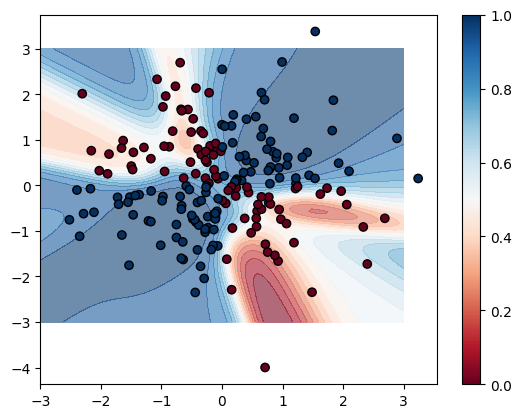

In [19]:
import matplotlib.pyplot as plt

def train_and_plot(m=10, alpha=0.01, epochs=1000):
    # XOR synthetic data
    X = np.random.randn(2, 200)
    y = (X[0] * X[1] > 0).astype(float).reshape(1, -1)

    nn = NN(m)
    nn.train(X, y, alpha, epochs)

    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    Z = np.array([nn.forward(np.array([[x], [y]])).item() for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.6)
    plt.scatter(X[0], X[1], c=y.ravel(), cmap='RdBu', edgecolors='k')
    plt.colorbar()
    plt.show()

train_and_plot()